## Motors BDC call data analysis : 3. memo 텍스트 분석 (관심시리즈, 서비스문의내용) 
- source : df_f.csv 
- size : 1,884 rows x 3 columns (csv file, 105 K) 
- *주의 : 한글 형태소 분석을 위해 KoNLpy 사용, 이를 위해 사전에 PC에 자바 jdk와 Jpype 설치 필요 
- https://liveyourit.tistory.com/56
---

In [1]:
## 필수 pkg's 및 한글폰트 사용 설정 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes',unicode_minus=False)
#plt.rcParams["figure.figsize"] = (8,3)
pd.set_option('display.max_columns', None)

In [2]:
## data loading 
df = pd.read_csv('data/df_f.csv', encoding='utf-8-sig')
print(df.shape)
df.head()

(1884, 3)


,(접수)번호,관심시리즈,서비스문의내용
0,959218,7시리즈 신형,NaN
1,959207,7시리즈,NaN
2,959179,X1 신형,NaN
3,958540,아직관심모델생각해놓지않음,NaN
4,958503,"X5, X7 디젤",NaN


In [3]:
df.tail()

,(접수)번호,관심시리즈,서비스문의내용
1879,1222824,NaN,엔진경고등 점등
1880,1222765,NaN,비상호출시스템 문제 있는거 발견돼서 센터에서 예약 잡고 연락준다 하였으나 연락없어서 문의
1881,1222748,NaN,타이어공기압 안맞춰짐 발란스맞춤 예약요청
1882,1222705,NaN,"정비불량으로 차량 다시 맡긴건데 대차차량 없다며 3주 기다리라고 했다며 불만,빠른시..."
1883,1220686,NaN,엔진오일 및 브레이크오일 점등


----
#### Part I. 관심시리즈 분석 
----

In [15]:
## konlpy 설치 및 임포트 
#!pip install konlpy
from konlpy.tag import Kkma
from konlpy.tag import Okt
from collections import Counter

In [16]:
## 관심시리즈 데이터를 하나의 문자열로 만든다. (값이 NaN인 것은 제외한다.) 
## !주의 : 문자열이 아닌 데이터가 (ex. 숫자) 포함된 경우 에러발생. 먼저 문자열 변환을 해줘야 함 
df_t = df['관심시리즈'].dropna(axis = 0)
df_t.apply(str)

text_series = df_t.tolist()
text_series = ''.join(text_series) 
text_series[:1000] 

'7시리즈 신형7시리즈X1 신형아직관심모델생각해놓지않음 X5, X7 디젤 X7X77시리즈신형X6X7X5 45eX6아직관심모델생각해놓지않음ix3X4X7전기차 iX3X5 M spt, X5 M50i3시리즈X7X5 X6X7&750i Xd530i3,5,X4 5시리즈 가솔린SUV차량520iX7 X5, 5시리즈 신형7시리즈 신형X77시리즈  신형ixX7 신형3, 4시리즈 X5, X6X3뒷자리 컵홀더 팔걸이 자리 올리고 내릴때 이상증상 AS요청7시리즈520iX7 M60i7시리즈신형X7X7320D520모델X5 45e 또는 X77시리즈신형X3i4IX 1X5,X6 /5시리즈 M850ix13 시리즈 5시리즈 둘다 관심X7X3 530620  / X5 45eiX1X3530i , 523d 5시리즈X6M3520ix5740i620dGT Xd Msp8 시리즈X5ix 1X3  X4520i530530iX7  X5 X7컨버터블,6GTX7 신형530i6시리즈X7 M60i7시리즈현차량보다 상위버전 큰차량 원한다고하심.신형5시리즈6GT  또는 4시리즈X6530i3시리즈 신형X46GTX5i7X3 X55시리즈 신형620 d GTX5  iXX4X7X57시리즈5시리즈5시리즈 신형,X4X5 M50i,X6 M50iX5 M50iX3x5530i320i TR640iX5 ix1(사전계약안내)7시리즈X5X5 630i, X4X46GTiX1X7 LCIX7 5시리즈X5 또는 X7 6시리즈X5X6X7 또는 7시리즈520i M SPT523dX6m340i tr 5시리즈 i4620 GTZ47시리즈 4륜 디젤차량문의X5X5, X7520i7시리즈X5520i 차량530iX5 신형5시리즈,6GT5시리즈X7X6 X4X3ix 40,50X5X5X4 X3M440i 컨버520i 차량7X5 신형7시리즈 4시리즈 전기차750eX6,X5 5시리즈 신형X5 40d 5시리즈X7 또는 7시리즈 3시리즈X1ix3X3 Z4X4  620d gtX4X6X7 X5,X74시리즈ix 50X7 X5M220i,120iX5 i7 신형 7 시리즈7시리즈 신형(올해 안 구매희망)3

In [17]:
## 텍스트를 토큰화(tokenize, 형태소 단위로 구분)
#kkma = Kkma()
#token = kkma.nouns(text_series)  ## 명사만 추출 
okt = Okt()
token = okt.morphs(text_series)  ## 형태소 단위로 추출 
print(token)

['7시', '리즈', '신형', '7시', '리즈', 'X', '1', '신형', '아직', '관심', '모델', '생각', '해놓지', '않음', 'X', '5', ',', 'X', '7', '디젤', 'X', '7', 'X', '77시', '리즈신형', 'X', '6', 'X', '7', 'X', '5', '45', 'eX', '6', '아직', '관심', '모델', '생각', '해놓지', '않음', 'ix', '3', 'X', '4', 'X', '7', '전기차', 'iX', '3', 'X', '5', 'M', 'spt', ',', 'X', '5', 'M', '50', 'i', '3시', '리즈', 'X', '7', 'X', '5', 'X', '6', 'X', '7', '&', '750', 'i', 'Xd', '530', 'i', '3', ',', '5', ',', 'X', '4', '5시', '리즈', '가솔린', 'SUV', '차량', '520', 'iX', '7', 'X', '5', ',', '5시', '리즈', '신형', '7시', '리즈', '신형', 'X', '77시', '리즈', '신형', 'ixX', '7', '신형', '3', ',', '4시', '리즈', 'X', '5', ',', 'X', '6', 'X', '3', '뒷', '자리', '컵홀더', '팔걸이', '자리', '올리고', '내릴', '때', '이상', '증상', 'AS', '요청', '7시', '리즈', '520', 'iX', '7', 'M', '60', 'i', '7시', '리즈신형', 'X', '7', 'X', '7320', 'D', '520', '모델', 'X', '5', '45', 'e', '또는', 'X', '77시', '리즈신형', 'X', '3', 'i', '4', 'IX', '1', 'X', '5', ',', 'X', '6', '/', '5시', '리즈', 'M', '850', 'ix', '13', '시리즈', '5시', '리즈', '둘다', '관심', 'X'

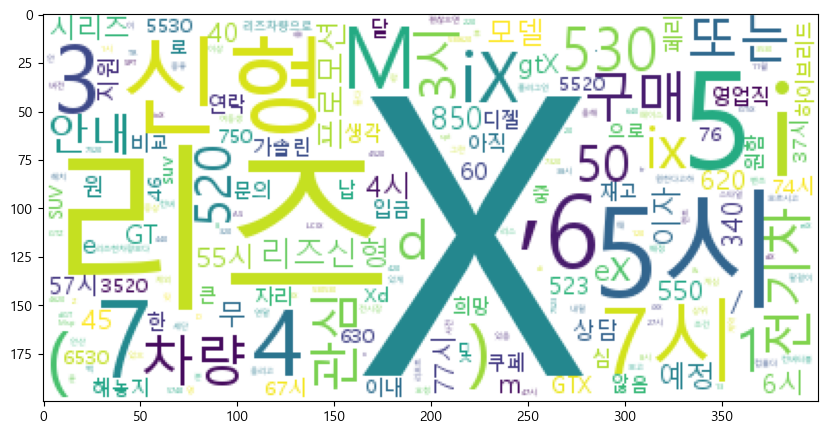

In [18]:
## 워드클라우드 그리기 
#!pip install WordCloud 
from matplotlib import font_manager, rc 
from wordcloud import WordCloud 

count_token = Counter(token)  ## 토큰별 갯수 세기 

wc = WordCloud(font_path='malgun', background_color='white', max_font_size=200)
cloud = wc.generate_from_frequencies(count_token)

plt.figure(figsize=(10,10))
plt.imshow(cloud) 
plt.axis('on') 
plt.show()

In [19]:
## 토큰(단어별) 빈도수를 데이터프레임으로 만들기 
sorted_count_token = sorted(count_token.items(), key= lambda item:item[1], reverse=True)
interest_models = pd.DataFrame(sorted_count_token)
interest_models

## csv 파일로 내보내기
#interest_models.to_csv('output/interest_models.csv', index=False, encoding='utf-8-sig')

,0,1
0,X,181
1,리즈,123
2,5,69
3,i,60
4,5시,58
...,...,...
242,iix,1
243,:,1
244,75시,1
245,35시,1


----
#### Part II. 서비스문의내용 분석 
----

In [20]:
## 서비스문의내용 데이터를 하나의 문자열로 만든다. (값이 NaN인 것은 제외한다.) 
## !주의 : 문자열이 아닌 데이터가 (ex. 숫자) 포함된 경우 에러발생. 먼저 문자열 변환을 해줘야 함 
df_t2 = df['서비스문의내용'].dropna(axis = 0)
df_t2.apply(str)

text_series2 = df_t2.tolist()
text_series2 = ''.join(text_series2) 
text_series2[:1000] 

'브레이크오일리콜예약점검시기 지났다고 안내멘트 매일나옴리콜예약 센터 점검후 뒷자리 선루프 조작안됨. 브레이트 소음 문의오토라이트 꺼졌다가 켜졌다가 함.후방 카메라 경고등센터방문이후 차량 떨림증상 발생됨.미션오일 교체 문의정기점검및배기가스 점검등 AS요청 뒷브레이크 패드 교체 비용문의리콜 예약 요청 에어컨작동안함. AS요청엔진오일 교환차선이탈방지 오작동수리후계기판안쪽에서소나사풀린듯소리발생(커브돌때)엔진오일 경고등 점검AS요청 풍절음 관련 AS요청깜빡이 소리 안들림,운전자 보조장치 간혹 에러메세지 뜨면서 작동안됨,차량진동 심해짐,브레이크 밟을때 끼익 소음 발생열선시트 통풍시트 버튼불량리콜 예약 요청(센터에서 고객님께 2월에 연락달라고 했다함)리모트 서비스 업데이트 후 차에 전송까지 완료하고 설치 가능 할 때 안내 될거라고 하더니 그대로 만료됐다함브레이크 패드 점검등 뜸서비스 받았던 텐션스트럿쪽 소음 발생냉간시 시동걸면 차량 꿀럭 거림 AS요청리콜예약 정기점검 점등AS요청운전석쪽에서 고속주행시 소음발생 (떨림) 점검AS요청브레이크패드교체AS요청 리콜AS요청점검등 점등(서비스기간끝나면 상세항목 안나오는지 문의)브레이크 밟을 때 소음 발생 고속주행시 차량 흔들림 심함AS요청 브레이크액 서비스 AS요청 1.운전석뒷쪽 콘트롤함 오일샘 2.등속조인트쪽 문제 3.뒷쪽 누유있음 AS요청브레이크오일 AS요청 엔진오일 교환AS요청후진시 PBC알람 리콜AS요청엔진수리이후 엑셀밟으면 울컥거리는 증상발생 AS요청타이어관련문의 앞뒤사이즈 다른 뒷타이어 관련 문의 AS요청 리콜AS요청브레이크오일연비 디스플레이 되는 부분이 고정되어있음운전자지원시스템 오류엔진오일,브레이트 패드 교체 문의리콜문의 (계기판컨트롤유닛)뒤쪽 머플러 소음 발생 실내에서도 발생 엔진오일 ,브레이크 패드 앞교체 문의 (8/5일 캠페인안내)와이퍼 교체후 소음발생엑셀밟으면 진동 점검이후로 배터리 표시 뜨고 자동으로 리셋된다고함. 골프백관련 신청건 있은데 언제 받을수 있는지 문의뒷브레이크 패드 점검등EGR리콜예약리콜요청 AS요

In [26]:
## 텍스트를 토큰화(tokenize, 형태소 단위로 구분)
token2 = okt.morphs(text_series2, norm=True, stem=True) 
print(token2)

['브레이크', '오', '일', '리콜', '예', '약', '점검', '시기', '지나다', '안내', '멘트', '매일', '나오다', '리콜', '예약', '센터', '점검', '후', '뒷', '자리', '선', '루프', '조작', '안되다', '.', '브레이', '트', '소음', '문의', '오토', '라이트', '꺼지다', '켜지다', '함', '.', '후방', '카메라', '경', '고등', '센터', '방문', '이후', '차량', '떨리다', '증상', '발생', '되다', '.', '미션', '오일', '교체', '문의', '정기', '점검', '및', '배기가스', '점검', '등', 'AS', '요청', '뒷', '브레이크', '패드', '교체', '비용', '문의', '리콜', '예약', '요청', '에어컨', '작동', '안함', '.', 'AS', '요청', '엔진오일', '교환', '차선', '이탈', '방지', '오', '작', '동', '수리', '후계', '기', '판', '안쪽', '에서', '소', '나사', '풀리다', '소리', '발생', '(', '커브', '돌때', ')', '엔진오일', '경', '고등', '점검', 'AS', '요청', '풍', '절음', '관련', 'AS', '요청', '깜빡이다', '소리', '안', '들리다', ',', '운전자', '보조', '장치', '간혹', '에러', '메세지', '뜨다', '작동', '안되다', ',', '차량', '진동', '심해지다', ',', '브레이크', '밟다', '때', '끼익', '소음', '발생', '열선', '시트', '통풍', '시트', '버튼', '불량', '리콜', '예약', '요청', '(', '센터', '에서', '고객', '님', '께', '2월', '에', '연락', '달라', '고', '하다', '함', ')', '리', '모트', '서비스', '업데이트', '후', '차', '에', '전송', '까지', '완료', '하고', 

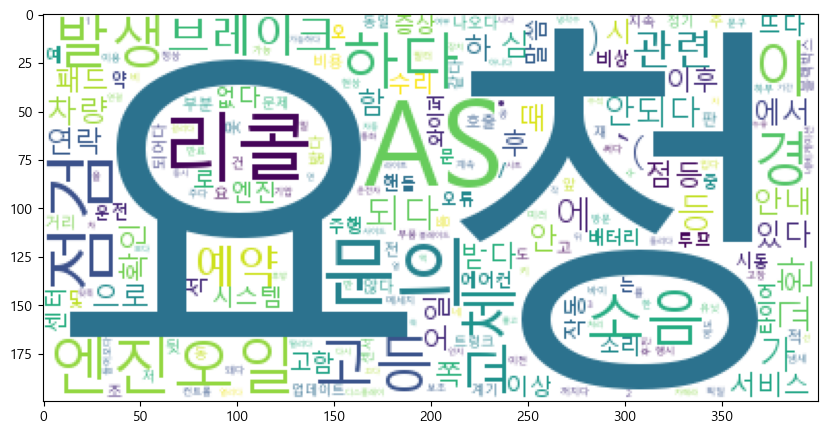

In [27]:
## 워드클라우드 그리기 
count_token2 = Counter(token2)  ## 토큰별 갯수 세기 

wc = WordCloud(font_path='malgun', background_color='white', max_font_size=200)
cloud = wc.generate_from_frequencies(count_token2)

plt.figure(figsize=(10,10))
plt.imshow(cloud) 
plt.axis('on') 
plt.show()

In [30]:
## 불필요한 단어가 너무 많아, 전처리 필요 
del_list = ['요청', '문의', '발생', '관련', '점검']

word_cleaned = []
for word in token2:
    if (len(word) > 1) & (word not in del_list) : ## del_list에 있는 단어들과, 한글자로 구성된 단어들은 제외 
        word_cleaned.append(word)
        
print(word_cleaned)

['브레이크', '리콜', '시기', '지나다', '안내', '멘트', '매일', '나오다', '리콜', '예약', '센터', '자리', '루프', '조작', '안되다', '브레이', '소음', '오토', '라이트', '꺼지다', '켜지다', '후방', '카메라', '고등', '센터', '방문', '이후', '차량', '떨리다', '증상', '되다', '미션', '오일', '교체', '정기', '배기가스', 'AS', '브레이크', '패드', '교체', '비용', '리콜', '예약', '에어컨', '작동', '안함', 'AS', '엔진오일', '교환', '차선', '이탈', '방지', '수리', '후계', '안쪽', '에서', '나사', '풀리다', '소리', '커브', '돌때', '엔진오일', '고등', 'AS', '절음', 'AS', '깜빡이다', '소리', '들리다', '운전자', '보조', '장치', '간혹', '에러', '메세지', '뜨다', '작동', '안되다', '차량', '진동', '심해지다', '브레이크', '밟다', '끼익', '소음', '열선', '시트', '통풍', '시트', '버튼', '불량', '리콜', '예약', '센터', '에서', '고객', '2월', '연락', '달라', '하다', '모트', '서비스', '업데이트', '전송', '까지', '완료', '하고', '설치', '가능', '하다', '안내', '되다', '하다', '그대로', '만료', '돼다', '브레이크', '패드', '서비스', '받다', '텐션', '스트럿', '소음', '간시', '시동', '걸다', '차량', '꿀럭', '거림', 'AS', '리콜', '예약', '정기', '점등', 'AS', '청운', '에서', '행시', '소음', '떨리다', 'AS', '브레이크', '패드', '교체', 'AS', '리콜', 'AS', '점등', '서비스', '기간', '끝나다', '상세', '항목', '나오다', '브레이크', '밟다', '소음', '행시', '차량'

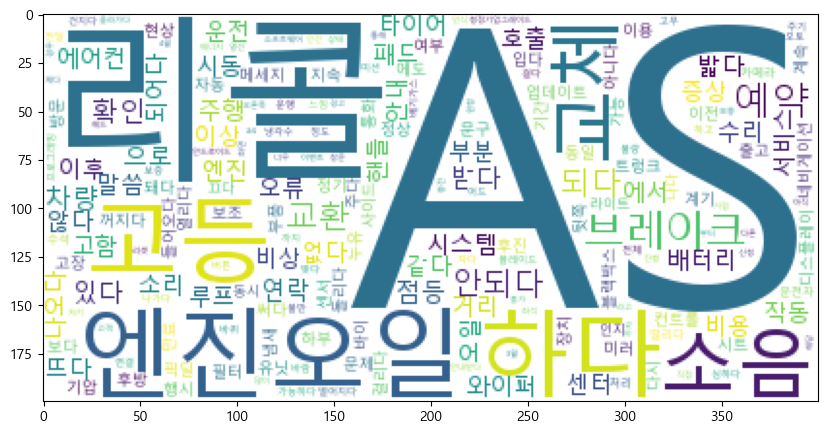

In [32]:
## 워드클라우드 다시 그리기 
count_token3 = Counter(word_cleaned)  ## 토큰별 갯수 세기 

wc = WordCloud(font_path='malgun', background_color='white', max_font_size=200)
cloud = wc.generate_from_frequencies(count_token3)

plt.figure(figsize=(10,10))
plt.imshow(cloud) 
plt.axis('on') 
plt.show()

In [33]:
## 토큰(단어별) 빈도수를 데이터프레임으로 만들기 
sorted_count_token3 = sorted(count_token3.items(), key= lambda item:item[1], reverse=True)
service_question = pd.DataFrame(sorted_count_token3)
service_question

## csv 파일로 내보내기
#service_question.to_csv('output/service_question.csv', index=False, encoding='utf-8-sig')

,0,1
0,AS,454
1,리콜,301
2,엔진오일,202
3,고등,183
4,하다,182
...,...,...
1433,맞춤,1
1434,정비,1
1435,맡기다,1
1436,기다리다,1
